# Proyecto Final Parcial 2!!
### Estructuras Computacionales

En este jupyter notebook se muestran los __algoritmos__ realizados durante el curso de __Estructuras Computacionales II__, los cuales son listados a continuacion.

* Matriz de Adyacencia.
* Lista de Adyacencia.
* Recorrido de anchura.
* Recorrido en profundidad.
* Grafo conexo.
* Algoritmo de dijkstra.

Nota. Todos estos algoritmos estaran compuestos de en un solo archivo .py, para mantener el codigo correctamente organizado haremos uso de la POO.

#### Main Class
Clase principal que contendra todos los __algoritmos__.

Hagan sus programas en el metodo que le corresponde, si quieren definir variables que se inicializen 
al instanciar la clase de **Estructuras_Computacionales** ponganlas en el metodo **init** y comenten arriba del metodo colocando el algoritmo que estan desarrollando y para que es la variable que estan definiendo. Si quieren pueden utilizar variables de otros.

Para definir las variables deben usar '**self.variable = valor**' si quieren que el metodo sea privado usen
'**self.\__variable = valor**', y ya.

Cuando esten en github hagan un **fork** del repositorio del codigo para que lo copien, despues creen una rama que tenga el nombre del algoritmo que estan haciendo para que empiezen a hacer su parte.

In [ ]:
import heapq
import numpy as np

In [ ]:

class Unidad2:
    """
        La variable 'M_Adyacencia' es la matriz de adyacencia que se capturara en durante la ejecucion del método Matriz_Adyacencia.

        La variable 'lista' será utilizada para obtener una lista de adyancia que representará un grafo que sera capturado con el método Lista_Adyacencia.

        La variable 'matriz' es un grafo de ejemplo definido como su matriz de adyacencia ya que es necesaria para el algoritmo de componentes conexas.
        El metodo 'Grafo_Conexo' usa la variable 'matriz', la modifica para calcular la matriz de caminos e imprime las componentes conexas resultantes.
    """
    def __init__(self, numNodos=1, vertices=[1]):
        self.M_Adyacencia = np.zeros([numNodos, numNodos])

        self.lista = {v: [] for v in vertices}

        self.matriz = [[0, 0, 0, 1, 1, 0],
                       [0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 1],
                       [1, 1, 1, 0, 0, 0],
                       [0, 1, 1, 0, 0, 1],
                       [0, 0, 0, 0, 1, 0]]

        self.grafo = {
                        0: {3: 1, 4: 1},
                        1: {},
                        2: {5: 1},
                        3: {0: 1, 1: 1, 2: 1},
                        4: {1: 1, 2: 1, 5: 1},
                        5: {4: 1}}


    def Matriz_Adyacencia(self, numAristas):
        # Captura de los aristas del grafo no dirigido
        for i in range(numAristas):
            nodo1 = int(input("Ingresa el 1er vertice: "))
            nodo2 = int(input("ingresa el 2do vertice: "))
            self.M_Adyacencia[nodo1][nodo2] = 1
            self.M_Adyacencia[nodo2][nodo1] = 1

        # Impresion de la matriz de adyacencia
        print(self.M_Adyacencia)

    def Lista_Adyacencia(self, numAristas):
        # Captura de los aristas del grafo dirigido
        for i in range(numAristas):
            u = input("Ingrese el 1er vertice: ")
            v = input("Ingrese el 2do vertice: ")
            self.lista[u].append(v)

        # Impresion de la lista de adyacencia
        for nodo, adyacentes in self.lista.items():
            print(f'{nodo}: {adyacentes}')

    def Recorrido_Anchura(self):
        self.__cola = []    # Lista para representar la cola
        self.__cola.append(0)   # Metemos a la cola el 0 para representar el vertice A
        self.__visitados = [True, False, False, False, False, False]

        print("El recorrido por anchura es: ")
        while(len(self.__cola) != 0):   # Mientras la cola no este vacia
            element = self.__cola.pop(0)    # Sacamos el primer elemento de la cola
            print(chr(element + 65))

            for i, relacion in enumerate(self.matriz[element]):    # Checamos las relaciones del nodo actual con todos los demas nodos
                if relacion == 1 and self.__visitados[i] == False: # Si aun no se visita el nodo y se tiene relacion (1) con otro nodo, este se mete a la cola y se marca como visitado
                        self.__visitados[i] = True
                        self.__cola.append(i)

    def Recorrido_Profundidad(self):
        self.__pila = []    # Lista para representar la pila
        self.__pila.append(0)   # Metemos a la pila el 0 para representar el vertice A
        self.__visitados = [True, False, False, False, False, False]

        print("El recorrido por profundidad es: ")
        while(len(self.__pila) != 0):   # Mientras la cola no este vacia
            element = self.__pila.pop()  # Sacamos el ultimo elemento de la pila
            print(chr(element + 65))

            for i, relacion in enumerate(self.matriz[element]):    # Checamos las relaciones del nodo actual con todos los demas nodos
                if relacion == 1 and self.__visitados[i] == False:  # Si aun no se visita el nodo y si hay relacion (1) con otro nodo, este se mete a la pila y se marca como visitado
                        self.__visitados[i] = True
                        self.__pila.append(i)

    def Grafo_Conexo(self):
        self.__tam_matriz = len(self.matriz) #Tamano de la matriz o numero de vertices.
        self.__vertices = list(range(self.__tam_matriz)) #Vector auxiliar para saber el orden de los nodos una vez que se modifique la matriz.

        # Ciclo para llenar la diagonal principal con unos.
        for i in range(self.__tam_matriz):
            self.matriz[i][i] = 1

        # Ciclo para calcular la matriz de caminos.
        for i in range(self.__tam_matriz):
            j = 0
            temp = [False for k in range(self.__tam_matriz)] #Vector temporal para saber los nodos 'visitados'.
            temp[i] = True
            while j < self.__tam_matriz:
                if self.matriz[i][j] == 1 and not temp[j]:
                    for k, n in enumerate(self.matriz[j]):
                        self.matriz[i][k] = n if n == 1 else self.matriz[i][k]
                    temp[j] = True
                    j = 0
                    continue
                j += 1

        # Metodo de la burbuja para ordenar las filas de la matriz.
        for i in range(self.__tam_matriz - 1):
            for j in range(i + 1, self.__tam_matriz):
                if self.matriz[i].count(1) < self.matriz[j].count(1):
                    self.matriz[j], self.matriz[i] = self.matriz[i], self.matriz[j]
                    self.__vertices[j], self.__vertices[i] = self.__vertices[i], self.__vertices[j] #Cambio del orden de los nodos en el vector auxiliar.

        # Metodo de la burbuja para ordenar las columnas de la matriz.
        for i in range(self.__tam_matriz - 1):
            coli = [self.matriz[k][i] for k in range(self.__tam_matriz)]
            for j in range(i + 1, self.__tam_matriz):
                colj = [self.matriz[k][j] for k in range(self.__tam_matriz)]
                if coli.count(1) > colj.count(1):
                    for k in range(self.__tam_matriz):
                        self.matriz[k][i], self.matriz[k][j] = self.matriz[k][j], self.matriz[k][i]
                    coli, colj = colj, coli

        # Resultado
        print('Componentes conexas:')
        print('v1 = {', end = '')
        contador = 1
        for i in range(self.__tam_matriz - 1):
            print(chr(self.__vertices[i] + 65), end = '')
            if (self.matriz[i + 1][i] == 0):
                print('}')
                contador += 1
                print(f'v{contador} = {{', end = '')
                continue
            print(', ', end = '')
        print(f'{chr(self.__vertices[-1] + 65)}}}')

##------------------------------------------- ALGORITMO DE DIJKSTRA ----------------------------------------------------------------
    def Dijkstra(self, grafo, inicio):
        #Inicializar las distancias y el conjunto de nodos visitados
        distancias = {nodo: float('inf') for nodo in grafo}
        distancias[inicio] = 0

        #Usar una cola de prioridad para mantener los nodos no visitados
        cola_prioridad = [(0, inicio)]

        while cola_prioridad:
            #Obtener el nodo con la distancia más corta
            distancia_actual, nodo_actual = heapq.heappop(cola_prioridad)

            #Si la distancia actual es mayor que la conocida, ignorar este nodo
            if distancia_actual > distancias[nodo_actual]:
                continue

            #Explorar los nodos vecinos del nodo actual
            for vecino, peso in grafo[nodo_actual].items():
                distancia = distancia_actual + peso

                #Si encontramos una distancia más corta, actualizar
                if distancia < distancias[vecino]:
                    distancias[vecino] = distancia
                    #Agregar el vecino a la cola de prioridad
                    heapq.heappush(cola_prioridad, (distancia, vecino))
        return distancias

In [ ]:
obj = Unidad2()

Matriz de Adyacencia

In [ ]:
numNodos = int(input("Ingresa numero de nodos del grafo: "))
numAristas = int(input("Ingresa numero de aristas del grafo: "))

print("Los vertices son:", end=" ")
for i in range(numNodos):
    print(i, end=", ")
print()

matriz = Unidad2(numNodos)
matriz.Matriz_Adyacencia(numAristas)

Lista de Adyacencia

In [ ]:
numNodos = int(input("Ingrese el numero de vertices: "))
numAristas = int(input("Ingrese el numero de aristas: "))

vertices = []

for i in range(numNodos):
    vertices.append(chr(i + 65))

print("Los vertices son: ", vertices)

lista = Unidad2(numNodos, vertices)
lista.Lista_Adyacencia(numAristas)

Recorrido en Anchura

In [ ]:
obj.Recorrido_Anchura()

Recorrido en Profundidad

In [ ]:
obj.Recorrido_Profundidad()

Algoritmo de Dijkstra

In [ ]:
nodo_inicio = 0
resultado = obj.Dijkstra(obj.grafo, nodo_inicio)
print(f"Distancias más cortas desde el nodo {nodo_inicio}: {resultado}")

Grafo Conexo

In [ ]:
obj.Grafo_Conexo()

# Proyecto Final Parcial 3!

***Algoritmos de Proyecto Final:***

- Unidad 3 

  * Programas para hacer el pareo de un grafo normal.
  * Programas para hacer el pareo de un grafo bipartido.
  * N problemas y modelado correspondiente de Pareo en grafos. N = cantidad de integrantes / 2. Tratar en los N problemas exista al menos uno de cada tipo: pareos perfectos, pareos maximales mínimos y pareos maximales       máximos. 
  * Investigar el concepto de pareos maximales mínimos.
 
 - Unidad 4

    * Programas Primero en Anchura y Primero en Profundidad para grafos dirigidos.
    * Comparación DFS y BFS con los algoritmos de grafos dirigidos y grafos no dirigidos.
    * N problemas y modelado correspondiente de grafos dirigidos ponderado o no. N = cantidad de integrantes / 2.

**Realizar la fotografía de equipo: Indicar en una tabla de cada integrante el entendimiento de cada programa realizado.**

![Python](https://th.bing.com/th/id/R.943803c137dc211e2279dbe80a17c401?rik=bS3wZ6WGrxGwtg&pid=ImgRaw&r=0)

## **Algoritmos y Problemas de Unidad III**

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from multiprocessing import Queue

class Unidad3:
    def __init__(self):
        self.bipartite_graph = [
            [0,1,0,1,1,0,0,0],
            [1,0,1,0,0,1,0,0],
            [0,1,0,1,0,0,1,0],
            [1,0,1,0,0,0,0,1],
            [1,0,0,0,0,1,0,1],
            [0,1,0,0,1,0,1,0],
            [0,0,1,0,0,1,0,1],
            [0,0,0,1,1,0,1,0],
        ]


    def pareo_grafo(self):
        # Creamos un grafo con 8 nodos
        G = nx.Graph()
        G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7), (6, 8), (7, 8), (7, 1), (8, 1)])

        # Encontramos el pareo perfecto máximo
        max_matching = set()
        nodes = set()
        for edge in G.edges():
            # If the edge isn't covered, add it to the matching
            # then remove neighborhood of u and v from consideration.
            u, v = edge
            if u not in nodes and v not in nodes and u != v:
                max_matching.add(edge)
                nodes.update(edge)

        # Definimos colores para los vértices
        node_colors = ['blue' if node not in max_matching else 'red' for node in G.nodes]

        # Dibujamos el grafo y resaltamos las aristas del pareo perfecto
        pos = nx.spring_layout(G)  # Posiciones para el dibujo
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=node_colors)
        nx.draw_networkx_edges(G, pos, edgelist=max_matching, edge_color='r', width=2)

        # Mostramos el resultado
        plt.show()


    """
        El siguiente Metodo nos ayuda en el Pareo de un Grafo Bipartito, primeramente
        con ayuda de unas funciones comprobamos que en efecto el grafo ingresado es Bipartito,
        para asi continuar con el pareo del Grafo.
    """
    def pareo_grafo_bipartido(self):
        NIL = 0
        INF = 2147483647
        # ------------------------------------------------------------------------
        # Funcion para graficar el Grafo Bipartito, diferenciando los nodos
        # que pertenecen al grupo u y v, ademas de agregar el emparejamiento
        # realizado.
        def plot_network(emp):
            # Crear el Grafo
            G = nx.Graph()
            # Agregar Nodos
            nodes = [i for i in range(1, len(self.bipartite_graph)+1)]
            G.add_nodes_from(nodes)
            # Agregar Bordes
            edges = []
            for i, row in enumerate(graph):
                for j, n in enumerate(row):
                    if n == 1:
                        edges.append( (i+1, j+1) )
            G.add_edges_from(edges)

            # Definir un color para cada grupo
            nodes_color = ["black" if g else "red" for g in self.groups]
            # Definir un color para cada emparejamiento
            edges_color = ["purple" if set(edg) in self.pairs else "gray" for edg in G.edges]

            # Graficar grafo.
            pos = nx.spring_layout(G)
            nx.draw(G, pos, with_labels= True, node_size= 700, 
                    node_color= nodes_color, font_size= 10, font_color= 'white', edge_color= edges_color,
                   linewidths= 1, alpha= 0.9, width = 5)

            # Mostrar el Grafo
            plt.text(x=-1.2, y=-1.2, s= f"Emparejamientos Maximos: {emp}", size= 12)
            plt.title('Emparejamiento de Grafo Bipartito')
            plt.show()

        # ------------------------------------------------------------------------
        # Las siguiente funciones comprueban si el Grafo es Bipartito y se obtienen
        # los vertices pertenecientes a cada grupo.
        def find_match(node, color, colors, graph):
            colors[node] = color
            for i, adj in enumerate(graph[node]):
                if adj:
                    if colors[i] == color:# Search for adjacent Nodes with the same color.
                        return False  
                    elif colors[i] == -1:
                        find_match(i, 0 if color else 1, colors, graph) # Assing a color for the node i.
            return True

        def is_bipartite(graph, colors):
            color = 0
            isin = False
            for node in range(len(graph)):
                if colors[node] == -1:
                    if isin:
                        return False # The graph is not connected.
                    isin = True

                    if not find_match(node, color, colors, graph):
                        return False # An adjacent node with same color was found.
            return True

        # ------------------------------------------------------------------------
        # Estas funciones realizan el pareo del Grafo bipartito una vez que se comprobo
        # que en efecto el grafo ingresado es bipartito.

        # Retorna un Booleano si aun existen rutas aumentadas.
        def bfs():
            Q = Queue()
            for u in range(1, self.__m+1):
                if self.pairU[u] == NIL:
                    self.dist[u] = 0
                    Q.put(u)
                else:
                    self.dist[u] = INF
            self.dist[NIL] = INF
            while not Q.empty():
                u = Q.get()
                if self.dist[u] < self.dist[NIL]:
                    for v in self.__adj[u]:
                        if self.dist[self.pairV[v]] == INF:
                            self.dist[self.pairV[v]] = self.dist[u] + 1
                            Q.put(self.pairV[v])
            return self.dist[NIL] != INF

        # Retorna True si se encontro una rutas aumentadas iniciando desde un vertice libre y
        # terminando en otro y asigna las parejas.
        def dfs(u):
            if u != NIL:
                for v in self.__adj[u]:
                    if self.dist[self.pairV[v]] == self.dist[u] + 1:

                        if dfs(self.pairV[v]):
                            self.pairV[v] = u
                            self.pairU[u] = v
                            return True

                self.dist[u] = INF
                return False
            return True

        def hopcroftKarp():
            self.pairU = [0 for _ in range(self.__m+1)]
            self.pairV = [0 for _ in range(self.__n+1)]
            self.dist = [0 for _ in range(self.__m+1)]
            result = 0
            while bfs():
                for u in range(1, self.__m+1):
                    if self.pairU[u] == NIL and dfs(u):
                        result += 1
            return result

        # ------------------------------------------------------------------------
        # En esta seccion se hace uso de las anteriores funciones para obtener el 
        # emparejamiento del grafo bipartito.

        graph = self.bipartite_graph     # Variable de la Clase.
        colors = [-1] * len(self.bipartite_graph)

        if is_bipartite(graph, colors):
            u = []
            v = []
            for i in range(len(graph)):
                if colors[i]: 
                    v.append(i)
                else: 
                    u.append(i)
            self.__m = len(u)
            self.__n = len(v)
            self.__adj =[[] for _ in range(self.__m+1)]

            for i, n in enumerate(u):
                for j, node  in enumerate(np.array(graph[n])[v]):
                    if node == 1:
                        self.__adj[i+1].append(j+1)

            result = hopcroftKarp()
            self.pairs = [set((u[n1-1]+1,v[n2-1]+1))  for n1,n2 in zip(self.pairU[1:],self.pairV[1:])]
            self.groups = colors

            # Graficar el Grafo con el Respectivo Emparejamiento y Division Bipartita.
            plot_network(result)

        else:
            print("* El Grafo No es Bipartito.")

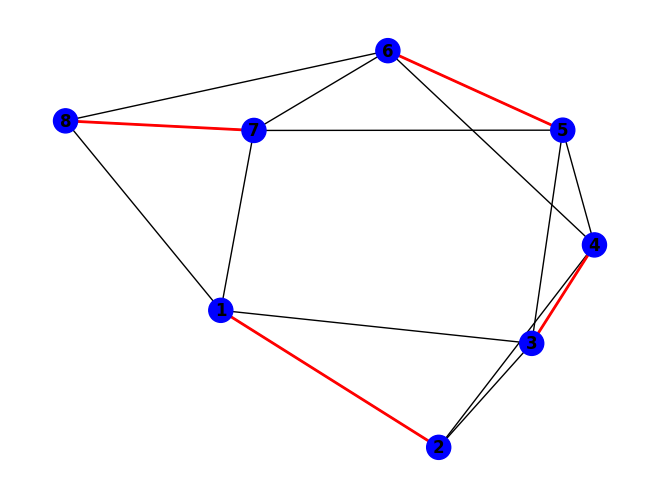

In [2]:
# Ejecucion del Emparejamiento del Grafo no Bipartito
obj = Unidad3()
obj.pareo_grafo()

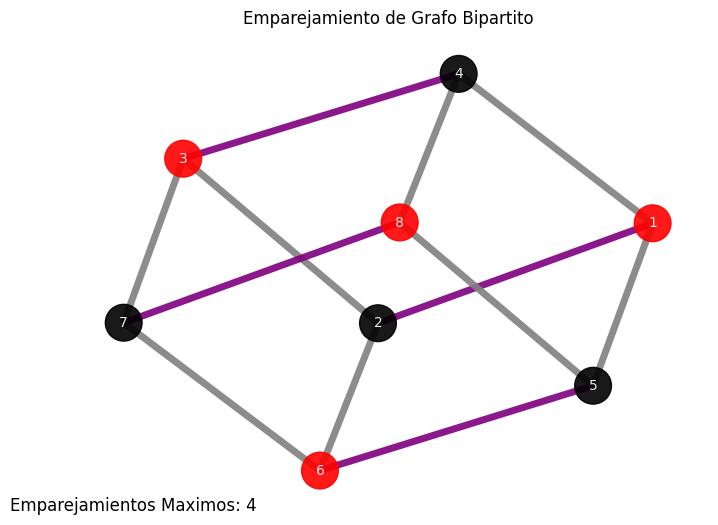

In [3]:
# Ejecucion del Emparejamiento del Grafo Bipartito
obj = Unidad3()
obj.pareo_grafo_bipartido()

### A continuacion se redactan los N *problemas* de ***Pareo de Grafos***.

- **Problema 1:** Considere el siguiente grafo no dirigido, donde los nodos representan personas y las aristas representan posibles relaciones de amistad:\
\
![Unidad 3 Problema 1.1](./assets/u3_problema1_1.jpg)\
\
Realiza el pareo maximal máximo en este grafo.\
\
**Solucion:** M = {(A, B), (C, D), (E, F)}\
\
![Unidad 3 Problema 1.2](./assets/u3_problema1_2.jpg)

* **Problema 2:** Sea un conjunto de vértices del grafo los empleados de una empresa, otro las tareas por hacer, y las aristas cada tarea que requiere habilidades específicas de los empleados.\
Realiza el pareo perfecto en el siguiente grafo:\
\
![Unidad 3 Problema 2.1](./assets/u3_problema2_1.jpg)\
\
**Solucion:** M: {(A, C), (B, E), (D, F)}\
\
![Unidad 3 Problema 2.2](./assets/u3_problema2_2.jpg)

* **Problema 3:** Sean los vértices del grafo las diferentes computadoras en una red, y las aristas las diferentes conexiones entre ellas:\
\
![Unidad 3 Problema 3.1](./assets/u3_problema3_1.jpg)\
\
**Solucion:** M: {(A, B), (C, D), (C, E)}\
\
![Unidad 3 Problema 3.2](./assets/u3_problema3_2.jpg)

* **Problema 4:** Sean el primer grupo de vértices del siguiente grafo los autómatas de una empresa, el segundo los deberes por hacer y el tercero la habilidad de cada autómata de realizar cada deber:\
Realice el pareo perfecto del siguiente grafo:\
\
![Unidad 3 Problema 4.1](./assets/u3_problema4_1.jpg)\
\
**Solucion:** M: {(1, D), (2, C), (4, A)}\
\
![Unidad 3 Problema 4.2](./assets/u3_problema4_2.jpg)

* **Problema 5:** Sea el primer conjunto de vértices del grafo, los conductores de un servicio de transporte, el segundo los pasajeros, y las aristas la habilidad de cada conductor de llevar a cierto pasajero:\
Realiza el pareo perfecto del siguiente grafo:\
\
![Unidad 3 Problema 5.1](./assets/u3_problema5_1.jpg)\
\
**Solucion:** M: {(1, A), (3, B), (4, D)}\
\
![Unidad 3 Problema 5.2](./assets/u3_problema5_2.jpg)

### Concepto de  **Pareos Maximales Mínimos**

Se refiere a la identificación de una asignación óptima entre dos conjuntos, maximizando la cantidad de elementos emparejados (maximal) y minimizando la cantidad de emparejamientos incomparables (mínimos).

En la teoría de grafos y la teoría de juegos, los pareos maximales mínimos se aplican a problemas de emparejamiento donde se busca emparejar elementos de un conjunto con elementos correspondientes en otro conjunto, generalmente con restricciones específicas. Por ejemplo, en el problema de asignación de tareas, se puede buscar el emparejamiento de trabajadores con tareas de manera que se maximice la productividad total mientras se minimiza la cantidad de trabajadores o tareas que no tienen correspondencia.

En resumen, los pareos maximales mínimos implican encontrar una asignación óptima entre dos conjuntos, maximizando la cantidad de elementos emparejados y minimizando la cantidad de elementos sin pareja, según los criterios específicos del problema en cuestión

## **Algoritmos y Problemas de Unidad IV**

Realizar una comparacion en los algoritmos de **Anchura y Profundidad** para grafos **dirigidos y no dirigidos**, se puede medir el tiempo de ejecucion de un algoritmo usando **%%timeit**  al inicio de la celda.

In [4]:
class Unidad4:
    def __init__(self):
        self.grafo_ND = [
            [0, 1, 1, 0, 1, 0],
            [1, 0, 0, 1, 0, 0],
            [1, 0, 0, 1, 1, 0],
            [0, 1, 1, 0, 0, 1],
            [1, 0, 1, 0, 0, 1],
            [0, 0, 0, 1, 1, 0],
        ]

        self.grafo_D = [
            [0, 1, 0, 0, 1, 0],
            [0, 0, 0, 1, 0, 0],
            [1, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 1],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 1, 0],
        ]

    def anchura_grafo_dirigido(self):
        self.__cola = []  # Lista para representar la cola
        self.__cola.append(0)  # Metemos a la cola el 0 para representar el vertice A
        self.__visitados = [True, False, False, False, False, False]

        print("El recorrido por anchura es: ")
        while len(self.__cola) != 0:  # Mientras la cola no este vacia
            element = self.__cola.pop(0)  # Sacamos el primer elemento de la cola
            print(chr(element + 65))

            for i, relacion in enumerate(
                self.grafo_D[element]
            ):  # Checamos las relaciones del nodo actual con todos los demas nodos
                if (
                    relacion and self.__visitados[i] == False
                ):  # Si aun no se visita el nodo y se tiene relacion (1) con otro nodo, este se mete a la cola y se marca como visitado
                    self.__visitados[i] = True
                    self.__cola.append(i)

    def profundidad_grafo_dirigido(self):
        self.__pila = []  # Lista para representar la pila
        self.__pila.append(0)  # Metemos a la pila el 0 para representar el vertice A
        self.__visitados = [True, False, False, False, False, False]

        print("El recorrido por profundidad es: ")
        while len(self.__pila) != 0:  # Mientras la cola no este vacia
            element = self.__pila.pop()  # Sacamos el ultimo elemento de la pila
            print(chr(element + 65))

            for i, relacion in enumerate(self.grafo_D[element]):  # Checamos las relaciones del nodo actual con todos los demas nodos
                if (
                    relacion and self.__visitados[i] == False
                ):  # Si aun no se visita el nodo y se tiene relacion (1) con otro nodo, este se mete a la cola y se marca como visitado
                    self.__visitados[i] = True
                    self.__pila.append(i)

    def anchura_grafo_no_dirigido(self):
        self.__cola = []  # Lista para representar la cola
        self.__cola.append(0)  # Metemos a la cola el 0 para representar el vertice A
        self.__visitados = [True, False, False, False, False, False]

        print("El recorrido por anchura es: ")
        while len(self.__cola) != 0:  # Mientras la cola no este vacia
            element = self.__cola.pop(0)  # Sacamos el primer elemento de la cola
            print(chr(element + 65))

            for i, relacion in enumerate(
                self.grafo_ND[element]
            ):  # Checamos las relaciones del nodo actual con todos los demas nodos
                if (
                    relacion and self.__visitados[i] == False
                ):  # Si aun no se visita el nodo y se tiene relacion (1) con otro nodo, este se mete a la cola y se marca como visitado
                    self.__visitados[i] = True
                    self.__cola.append(i)

    def profundidad_grafo_no_dirigido(self):
        self.__pila = []  # Lista para representar la cola
        self.__pila.append(0)  # Metemos a la cola el 0 para representar el vertice A
        self.__visitados = [True, False, False, False, False, False]

        print("El recorrido por anchura es: ")
        while len(self.__pila) != 0:  # Mientras la cola no este vacia
            element = self.__pila.pop()  # Sacamos el primer elemento de la cola
            print(chr(element + 65))

            for i, relacion in enumerate(
                self.grafo_ND[element]
            ):  # Checamos las relaciones del nodo actual con todos los demas nodos
                if (
                    relacion and self.__visitados[i] == False
                ):  # Si aun no se visita el nodo y se tiene relacion (1) con otro nodo, este se mete a la cola y se marca como visitado
                    self.__visitados[i] = True
                    self.__pila.append(i)

In [5]:
obj = Unidad4()
obj.anchura_grafo_dirigido()

El recorrido por anchura es: 
A
B
E
D
C
F


In [6]:
obj.anchura_grafo_no_dirigido()

El recorrido por anchura es: 
A
B
C
E
D
F


In [7]:
obj.profundidad_grafo_dirigido()

El recorrido por profundidad es: 
A
E
C
B
D
F


In [8]:
obj.profundidad_grafo_no_dirigido()

El recorrido por anchura es: 
A
E
F
D
C
B


### Comparacion de DFS y BFS

Se pueden utilizar los mismos algoritmos o códigos de DFS y BFS tanto para grafos dirigidos y no dirigidos. Sin embargo se pueden notar algunos puntos debido a la naturaleza de los grafos.

* **Salida o resultado:** En los grafos dirigidos, los aristas tienen una dirección, por lo que ese arista solo se puede tomar de una forma, mientras que en los grafos no dirigidos los aristas no tienen dirección y estos se pueden tomar en ambas direcciones, esto afectará la forma en la que se realizan los recorridos.

* **Nodos inalcanzables:** En grafos dirigidos, algunos nodos pueden ser inalcanzables desde ciertos nodos de partida debido a la dirección de las aristas. Esto puede influir en el número de nodos alcanzables durante el recorrido BFS y podría generar componentes conexos distintos en comparación con un grafo no dirigido.

* **Complejidad temporal:** Ambos algoritmos son lineales en el número de nodos y aristas del grafo, independientemente si el grafo es dirigido o no dirigido, por lo que tanto el BFS y DFS en grafos dirigidos y no dirigidos tendrán la misma complejidad temporal.

* **Aplicaciones:** A pesar de las diferencias, BFS y DFS en grafos dirigidos se usa en muchas aplicaciones similares a las de los grafos no dirigidos, como encontrar el camino más corto entre dos nodos, verificar la conectividad entre nodos, determinar la estructura del grafo, etc.

### A continuacion se redactan los N *problemas* de ***Pareo de Grafos***.

- **Problema 1:** Considera un grafo dirigido que representa una red de carreteras entre ciudades. Las ciudades son los nodos del grafo y las carreteras son las aristas dirigidas entre ellas. Cada arista tiene un peso que representa la distancia entre dos ciudades.\
\
![Unidad 4 Problema 1.1](./assets/u4_problema1_1.jpg)\
\
Encuentra la distancia mínima desde la ciudad A la ciudad E.\
\
**Solucion:**\
\
![Unidad 4 Problema 1.2](./assets/u4_problema1_2.jpg)\
\
Utilizando el algoritmo de Dijkstra podemos saber que la distancia mínima desde A hasta E es 13, alcanzada a través de las ciudades A, C, D, y E.

- **Problema 2:** Considera un grafo dirigido que representa una red de vuelos entre aeropuertos. Los nodos del grafo son aeropuertos y las aristas dirigidas representan vuelos entre ellos. Cada arista tiene un peso que representa la duración del vuelo en horas.\
\
![Unidad 4 Problema 2.1](./assets/u4_problema2_1.jpg)\
\
Encuentra la duración mínima de vuelo desde el aeropuerto X hasta el aeropuerto V.\
\
**Solucion:**\
\
![Unidad 4 Problema 2.2](./assets/u4_problema2_2.jpg)\
\
La duración mínima desde X hasta V es 9 horas, alcanzada a través de las conexiones X, Z, W, y V.

- **Problema 3:** Imagina una ciudad con un sistema de transporte público, y queremos encontrar la ruta más corta entre dos estaciones de autobús. Cada estación de autobús es un nodo en el grafo dirigido, y las aristas representan las rutas entre estaciones con pesos que indican la distancia en kilómetros.\
Supongamos que tenemos las siguientes estaciones de autobús (nodos) y rutas (aristas) con sus respectivos pesos (distancias):\
\
![Unidad 4 Problema 3.1](./assets/u4_problema3_1.jpg)\
\
**Solucion:**\
Distancias finales: A: 0, B: 5 km, C: 3 km, D: 4 km.\
Ruta más corta de A a D: A -> C -> D.\
\
![Unidad 4 Problema 3.2](./assets/u4_problema3_2.jpg)

- **Problema 4:** Supongamos que estás planificando una red de telecomunicaciones para conectar diferentes ciudades en un país. Cada ciudad es un nodo en el grafo dirigido, y las aristas representan las conexiones de fibra óptica entre ellas. Los pesos de las aristas indican la latencia en milisegundos o el costo de la conexión.\
Consideremos las siguientes ciudades (nodos) y las conexiones de fibra óptica (aristas) con sus respectivos pesos (latencia o costo):\
\
![Unidad 4 Problema 4.1](./assets/u4_problema4_1.jpg)\
\
**Solucion:**\
Latencias finales: A: 0 ms, B: 10 ms, C: 15 ms, D: 25 ms, E: 19 ms, F: 24 ms, G: 25 ms.\
Ruta más eficiente de A a G: A -> B -> C -> G.\
\
![Unidad 4 Problema 4.2](./assets/u4_problema4_2.jpg)

- **Problema 5:** Gestionamos un proyecto con cinco tareas interdependientes. Cada tarea es un nodo en un grafo dirigido, y las aristas indican las dependencias entre las tareas. Los pesos de las aristas representan la duración estimada de cada tarea en días.\
Encontrar la mejor ruta de A -> E.\
\
![Unidad 4 Problema 5.1](./assets/u4_problema5_1.jpg)\
\
**Solucion:**\
Duraciones finales: A: 0 días, B: 2 días, C: 1 día, D: 3 días, E: 2 días.\
Ruta crítica: A -> C -> E.\
\
![Unidad 4 Problema 5.2](./assets/u4_problema5_2.jpg)




## Tabla de entendimiento

| Integrante | Pareo grafo normal | Pareo grafo bipartito | BFS grafo dirigido | DFS grafo dirigido |
|---|---|---|---|---|
| Arrioja Pizaña Cesar Emmanuel | 8 | 9 | 10 | 10 |
| Cruz Mora Angel | 9 | 10 | 10 | 10 |
| Diaz Robledo José Alfredo | 8 | 7 | 10 | 10 |
| Fernández Aguilar Aldo Raúl | 8 | 8 | 9 | 9 |
| Hernández Gómez Juan Pablo | 9 | 10 | 10 | 10 |
| Negrete De La Cruz Carlos Abraham | 10 | 9 | 10 | 10 |
| Rodríguez Martínez José Luis | 7 | 8 | 9 | 9 |
| Soto Alderete Luis Angel | 8 | 8 | 10 | 10 |
| Soto Parada Pablo Emilio | 7 | 7 | 9 | 9 |
| Vázquez Ornelas Miguel Angel | 9 | 9 | 10 | 10 |